In [553]:
#Inclusion of all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import statsmodels.api as sm

In [506]:
#Data COllection
df = pd.read_csv(" propulsion system data/rocket_propulsion_dataset_v1.csv")
print(df.shape)
print(df.head(n=5))

(250000, 11)
     fuel_type oxidizer_type  chamber_pressure_bar  oxidizer_fuel_ratio  \
0          LH2           LOX                203.20                3.759   
1  HTPB_Hybrid           LOX                162.02                2.334   
2     Tonka250           NTO                162.23                2.824   
3     Tonka250           NTO                177.15                3.552   
4         JP10           LOX                 67.83                2.562   

   combustion_temperature_K  heat_capacity_ratio  nozzle_expansion_ratio  \
0                    2838.1                1.199                   118.1   
1                    3348.8                1.204                     6.0   
2                    3027.2                1.257                   147.6   
3                    3033.0                1.259                   125.8   
4                    3642.9                1.234                     9.5   

   ambient_pressure_bar  specific_impulse_s  combustion_stability_margin  \
0  

In [507]:
#Data Cleaning & Inspection 
print(df.isna().sum())
print(df.info())
print(df.describe())

fuel_type                      0
oxidizer_type                  0
chamber_pressure_bar           0
oxidizer_fuel_ratio            0
combustion_temperature_K       0
heat_capacity_ratio            0
nozzle_expansion_ratio         0
ambient_pressure_bar           0
specific_impulse_s             0
combustion_stability_margin    0
physics_violation_flag         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fuel_type                    250000 non-null  object 
 1   oxidizer_type                250000 non-null  object 
 2   chamber_pressure_bar         250000 non-null  float64
 3   oxidizer_fuel_ratio          250000 non-null  float64
 4   combustion_temperature_K     250000 non-null  float64
 5   heat_capacity_ratio          250000 non-null  float64
 6   nozzle_expansion_ratio       250000 

<span style="color:green; font-weight:bold; font-style:italic">
This explicity illustrates that the data doesnt contain any missinig values, given the inspection of null counts and non-null entries.
    
The DataFrame confirms that 250,000 entries are present (rows), containing 11 columns, and 3 different Datatypes.

The dataset is diagnosed as a structured data as its has a predefiend schema, fixed fields and consistent data types across all rows. 

I can highly distinguish that the dataset doesnt seem to contain any outliers, altough this is an assumtpion from my analysis shown after running the fucntion: .describe().
</span>


In [508]:
#Distinguishing unqie attributes of the dataset :
print(df['fuel_type'].unique())
print(df['oxidizer_type'].unique())

['LH2' 'HTPB_Hybrid' 'Tonka250' 'JP10' 'UH25' 'Ethanol' 'Hydrazine_M'
 'Paraffin' 'CH4' 'LMP103S' 'DB_Solid' 'PBAN' 'UDMH' 'RP1' 'Methanol'
 'MMH' 'Ethane' 'Aerozine50' 'H2O2_98' 'NH3' 'Hydrazine' 'Syntin'
 'Aniline' 'APCP']
['LOX' 'NTO' 'Catalyst' 'Internal_AP']


<span style="color:green; font-weight:bold; font-style:italic">
Data Cleaning is a critical task.
    
An interesting encounter that each row data is unique from another and is not containing an null values.
</span>


<span style="color:green; font-weight:bold; font-style:italic">
Quantitative Deals with numbers Can be measured.
    
Qualitative Deals with descriptions Can be observed.

Binary indicator (encoded as numeric values) : physics_violation_flag, ambient_pressure_bar
</span>

In [509]:
df['physics_violation_flag'].value_counts()

physics_violation_flag
0    178851
1     71149
Name: count, dtype: int64

<span style="color:green; font-weight:bold; font-style:italic">
 This parameter diagnoses helps define if a violation in the physics parameters revolving within the dataset exists.
 
 0 → No violation, the row is physically valid.
 1 → Physics violation detected, the row is not physically valid.

We shouls only evaulate the study related to data with no violation. The flag critically is an marker that defines that if an aspect of the envrionement or the mechnsiam of the propulsion system during testing of the propulsion system didnt match the intended framework. 
</span>

In [510]:
df = df[df.physics_violation_flag == 0] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178851 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   fuel_type                    178851 non-null  object 
 1   oxidizer_type                178851 non-null  object 
 2   chamber_pressure_bar         178851 non-null  float64
 3   oxidizer_fuel_ratio          178851 non-null  float64
 4   combustion_temperature_K     178851 non-null  float64
 5   heat_capacity_ratio          178851 non-null  float64
 6   nozzle_expansion_ratio       178851 non-null  float64
 7   ambient_pressure_bar         178851 non-null  float64
 8   specific_impulse_s           178851 non-null  float64
 9   combustion_stability_margin  178851 non-null  float64
 10  physics_violation_flag       178851 non-null  int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 16.4+ MB


In [511]:
df = df.drop(columns='physics_violation_flag') # Given the purpose applied where we only tend to evaluate data that did not violate the physics of the working model.
#We can better of proceed without the column data :physics_violation_flag
df.duplicated().sum()

np.int64(0)

# Dataset Structure and Variable Classification
Before proceeding with further diagnostics, it is important to clarify the **structure of the dataset** and the role of each variable in relation to the analysis.

**Environment Variables**  
- `ambient_pressure_bar` – Represents the environmental pressure surrounding the engine.

**Input Variables**  
- `fuel_type` – Type of fuel used.  
- `oxidizer_type` – Type of oxidizer used.

**Output Variables**  
- `oxidizer_fuel_ratio`  
- `combustion_temperature_k`  
- `heat_capacity_ratio`  
- `nozzle_expansion_ratio`  
- `specific_impulse_s`  
- `combustion_stability_margin`

In [512]:
fuel_summary = pd.DataFrame({
    "Frequency": df['fuel_type'].value_counts(),
    "Proportion": df['fuel_type'].value_counts(normalize=True)
})
print(fuel_summary)

             Frequency  Proportion
fuel_type                         
Hydrazine_M      10719    0.059933
H2O2_98          10417    0.058244
LMP103S          10379    0.058032
Tonka250         10353    0.057886
Aniline          10303    0.057607
DB_Solid         10263    0.057383
LH2               9789    0.054733
RP1               8834    0.049393
PBAN              8826    0.049348
NH3               8663    0.048437
UDMH              8606    0.048118
UH25              8572    0.047928
CH4               8534    0.047716
MMH               8421    0.047084
JP10              8385    0.046883
Ethanol           8352    0.046698
Methanol          8282    0.046307
Aerozine50        7649    0.042767
Hydrazine         6444    0.036030
APCP              5550    0.031031
Syntin             566    0.003165
Paraffin           495    0.002768
HTPB_Hybrid        424    0.002371
Ethane              25    0.000140


In [513]:
oxidizer_summary = pd.DataFrame({
    "Frequency": df['oxidizer_type'].value_counts(),
    "Proportion": df['oxidizer_type'].value_counts(normalize=True)
})
print(oxidizer_summary)

               Frequency  Proportion
oxidizer_type                       
LOX                62349    0.348609
NTO                60348    0.337421
Catalyst           31515    0.176208
Internal_AP        24639    0.137763


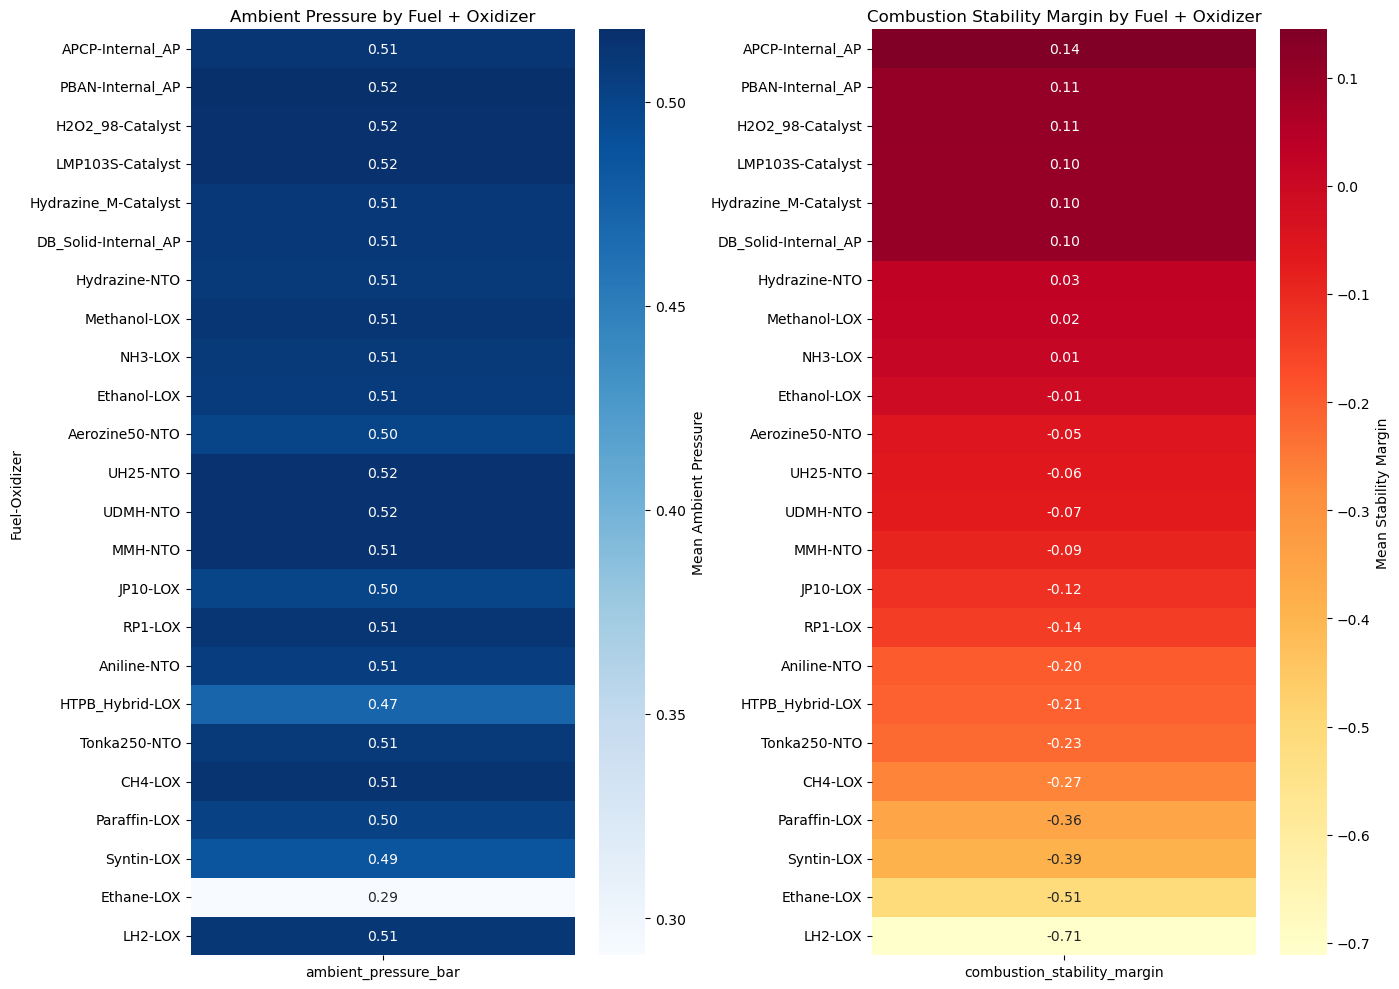

In [514]:
#Exploration and Visualization
#First trying disgnose the pressure and stability due to each fuel, given the dataset its better to see the evaluation using mean. 
#  Ambient Pressure
ambient = df.groupby(['fuel_type', 'oxidizer_type'])['ambient_pressure_bar'].mean().to_frame()

#  Stability Margin
stability = df.groupby(['fuel_type', 'oxidizer_type'])['combustion_stability_margin'].mean().to_frame()

sorted_index = stability.sort_values(by='combustion_stability_margin', ascending=False).index
ambient = ambient.loc[sorted_index]
stability = stability.loc[sorted_index]

# Plotting # when trying to plot two figures in one grid we need to address subplots function and assign a width of 14 and height of 10. 
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

# Heatmap 1: Ambient Pressure
sns.heatmap(ambient, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label':'Mean Ambient Pressure'},ax=axes[0])
axes[0].set_title('Ambient Pressure by Fuel + Oxidizer')
axes[0].set_xlabel('')
axes[0].set_ylabel('Fuel-Oxidizer')
# Combustion Stability Margin
sns.heatmap(stability, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label':'Mean Stability Margin'}, ax=axes[1])
axes[1].set_title('Combustion Stability Margin by Fuel + Oxidizer')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

#Sort fuel_oxidizer by mean stability descending, better representation and insights 


In [515]:
#Feature engineering, from studies it shows that we are not really describing fuel_types rather the fuel itself.
#As per study specfic classes exist to specific fuel types so we apply and address a similar feature for better contemplation of data.
fuel_classes = {
    "LH2": "Cryogenic fuel", #High performance, source petroluem deposits plus organic wastes
    "CH4": "Cryogenic fuel",
    "Ethane": "Cryogenic fuel",
    "NH3": "Cryogenic fuel",

    "RP1": "Storable hydrocarbon", #Liquid at ambient conditions
    "JP10": "Storable hydrocarbon",
    "Syntin": "Storable hydrocarbon",
    "Ethanol": "Storable hydrocarbon",
    "Methanol": "Storable hydrocarbon",
    "Paraffin": "Storable hydrocarbon",
    "Aniline": "Storable hydrocarbon",

    "UDMH": "Storable hypergolic fuels", # Ignite on contact with NTO
    "MMH": "Storable hypergolic fuels",
    "Hydrazine": "Storable hypergolic fuels",
    "Hydrazine_M": "Storable hypergolic fuels",
    "Aerozine50": "Storable hypergolic fuels",
    "UH25": "Storable hypergolic fuels",
    "Tonka250": "Storable hypergolic fuels",

    "H2O2_98": "Monopropellants",
    "LMP103S": "Monopropellants",

    "PBAN": "Solid fuels", #decompose without external oxidizer
    "HTPB_Hybrid": "Solid fuels",
    "DB_Solid": "Solid fuels",
    
    "APCP": "Solid composite"  #Fuel + oxidizer in one grain
}
#https://headedforspace.com/what-fuels-do-rockets-use/
#https://spacecraftandvehicles.com/articles/types-of-rocket-fuel/
# RP1 - HIghly Reformed Kerosene 
# Apply mapping directly to the 'fuel_type' column
df["fuel_type"] = df["fuel_type"].map(fuel_classes)

In [516]:
#  unmapped fuel types
df[df["fuel_type"].isna()]["fuel_type"].value_counts()

Series([], Name: count, dtype: int64)

In [517]:
# No fuel type is left unmapped
print("Fuel type counts:\n", df["fuel_type"].value_counts())
print(df.head(n=5))

Fuel type counts:
 fuel_type
Storable hypergolic fuels    60764
Storable hydrocarbon         45217
Cryogenic fuel               27011
Monopropellants              20796
Solid fuels                  19513
Solid composite               5550
Name: count, dtype: int64
                   fuel_type oxidizer_type  chamber_pressure_bar  \
0             Cryogenic fuel           LOX                203.20   
2  Storable hypergolic fuels           NTO                162.23   
3  Storable hypergolic fuels           NTO                177.15   
4       Storable hydrocarbon           LOX                 67.83   
5  Storable hypergolic fuels           NTO                 52.41   

   oxidizer_fuel_ratio  combustion_temperature_K  heat_capacity_ratio  \
0                3.759                    2838.1                1.199   
2                2.824                    3027.2                1.257   
3                3.552                    3033.0                1.259   
4                2.562            

<span style="color:green; font-weight:bold; font-style:italic">
The preceding data-driven remapping is intentionally applied to discretize fuel representations and reduce excessive technical specificity at the individual fuel level. By grouping fuels into fuel categories. Each fuel category exhibits characteristic which provides a more meaningful and interpretable context for analyzing the dataset.

While an oxidizer column is present in the dataset, it will be treated strictly as an identifying entity associated with the corresponding fuel type. The oxidizer is not considered an independent variable for further computational analysis. Its role is dependent on the type of fuel being utiilized, specifiying induglence in combustion ignition. The dataset is therefore constrained to fuel-type-driven analysis, with oxidizer information excluded from subsequent computational modeling.
</span>


In [518]:
df['ambient_pressure_bar'].value_counts()

ambient_pressure_bar
0.01000    89580
1.01325    89271
Name: count, dtype: int64

<span style="color:green; font-weight:bold; font-style:italic">
0.01 --> vacuum testing.

1.01325 --> standard atmospheric pressure for ground-level tests.
</span>

Index(['fuel_type', 'oxidizer_type', 'chamber_pressure_bar',
       'oxidizer_fuel_ratio', 'combustion_temperature_K',
       'heat_capacity_ratio', 'nozzle_expansion_ratio', 'ambient_pressure_bar',
       'specific_impulse_s', 'combustion_stability_margin'],
      dtype='object')


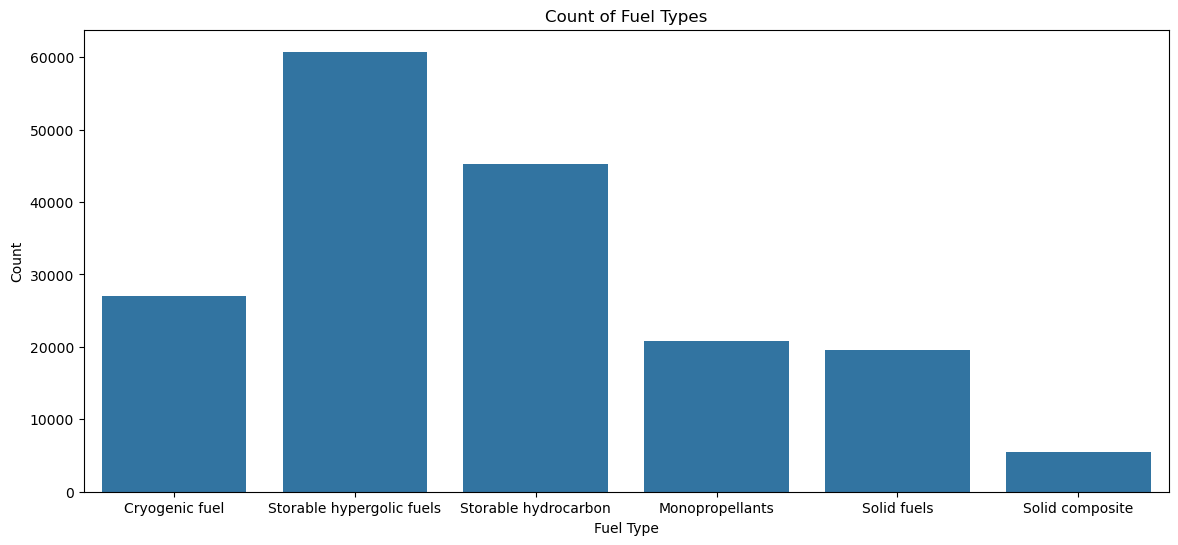

In [519]:
print(df.columns)
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='fuel_type')
plt.title('Count of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

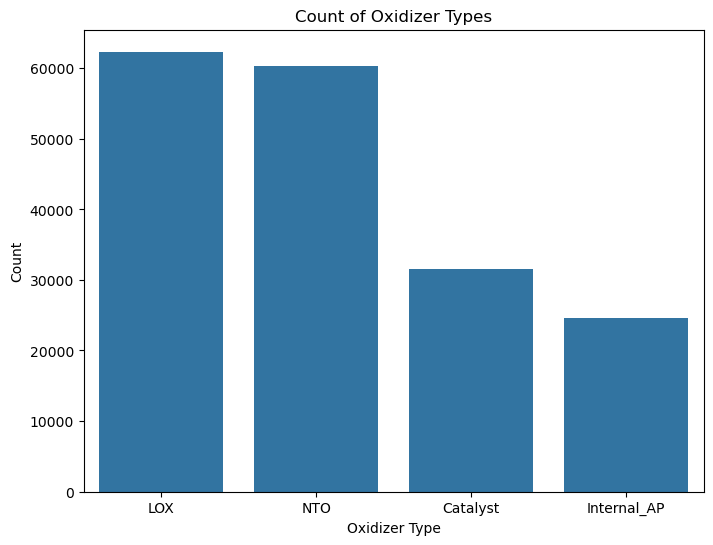

In [520]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='oxidizer_type')
plt.title('Count of Oxidizer Types')
plt.xlabel('Oxidizer Type')
plt.ylabel('Count')
plt.show()

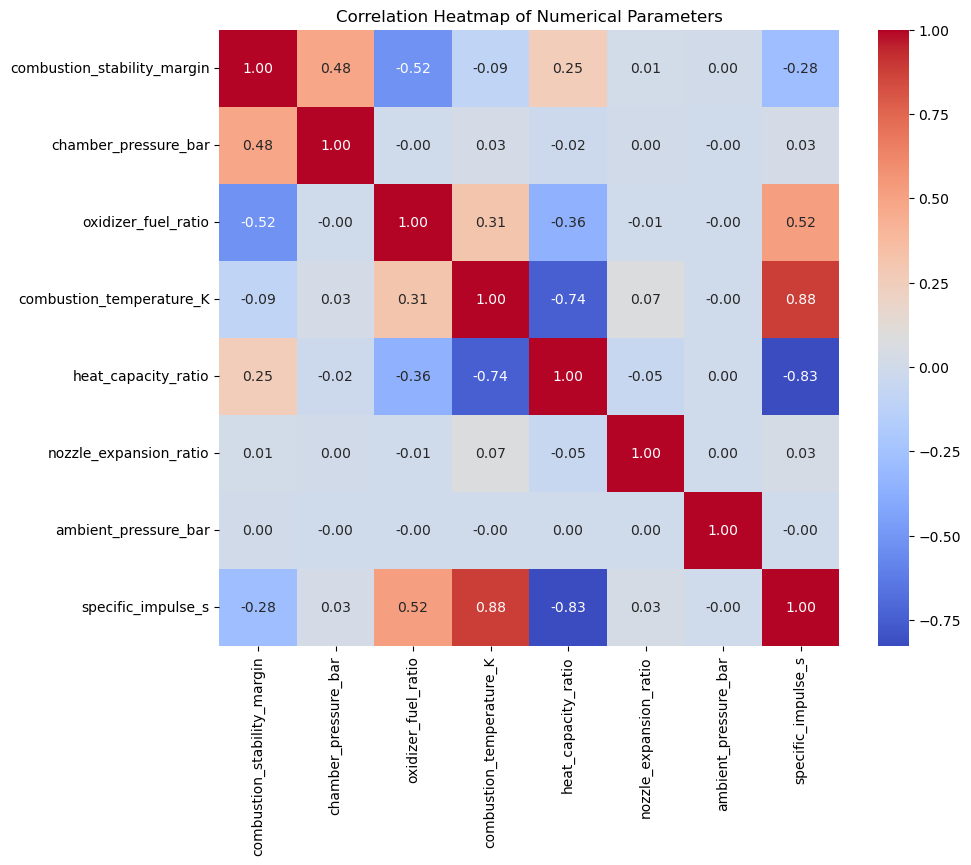

In [521]:
cols_of_interest = [
    "combustion_stability_margin",
    "chamber_pressure_bar",
    "oxidizer_fuel_ratio",
    "combustion_temperature_K",
    "heat_capacity_ratio",
    "nozzle_expansion_ratio",
    "ambient_pressure_bar",
    "specific_impulse_s"
]
# Compute correlation matrix
corr_matrix = df[cols_of_interest].corr()
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Parameters')
plt.show()

# Ambient Pressure Bar Analysis
The heatmap shows that `ambient_pressure_bar` is primarily an **environmental variable** and does **not directly influence** the other dataset features.  
While it provides context about the engine's operating environment, it will **not be used in subsequent calculations or analyses**

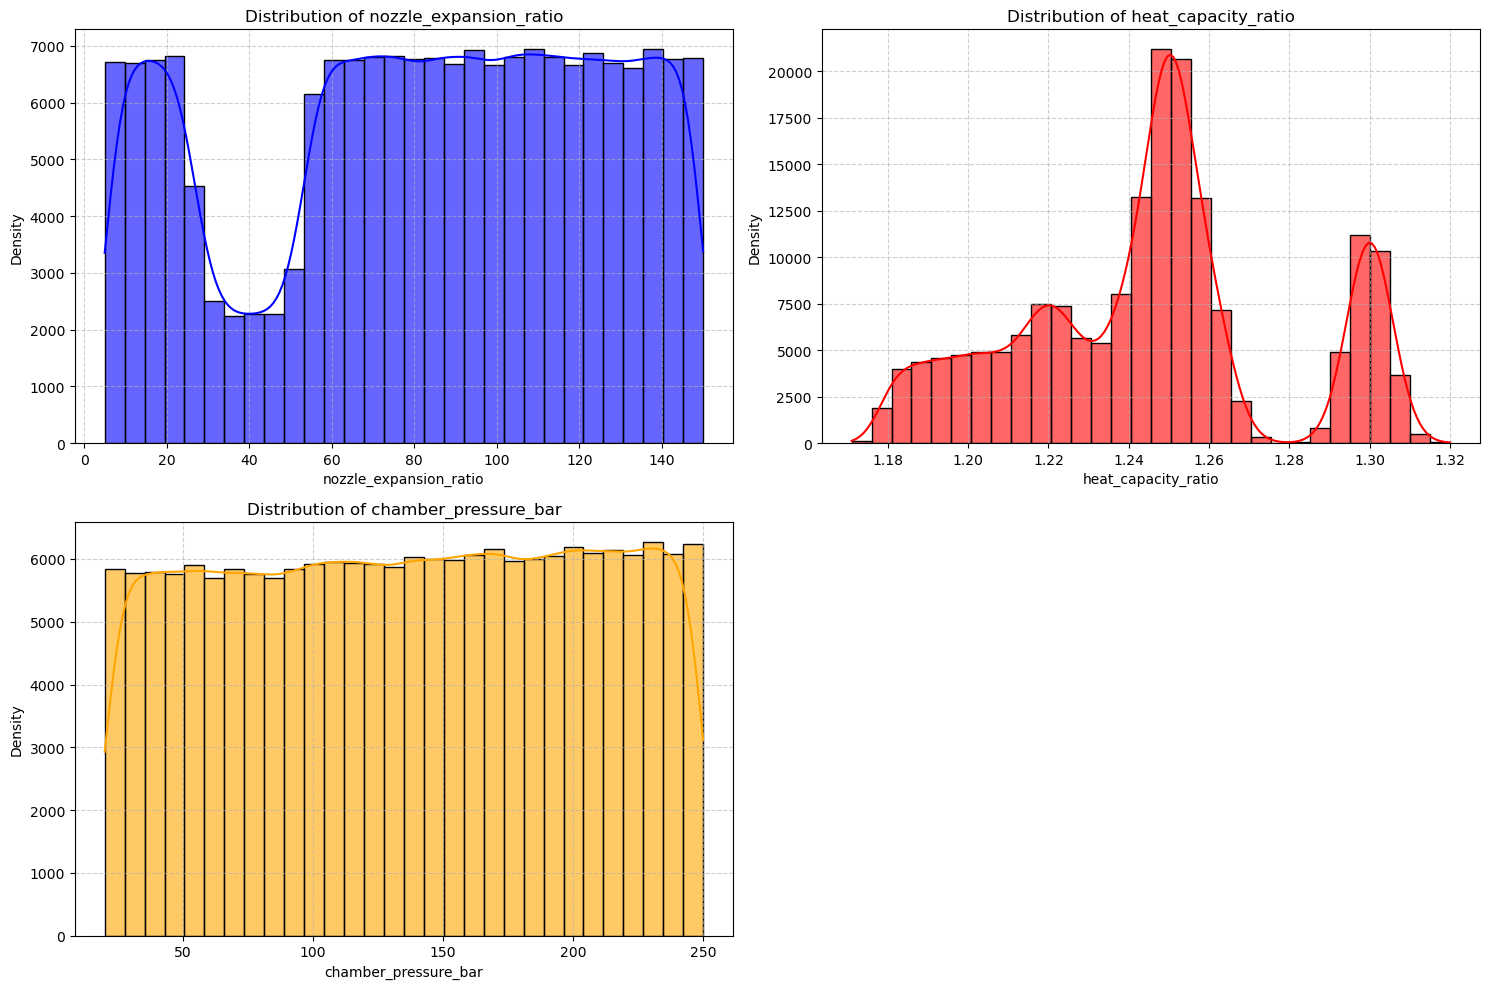

In [522]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df["nozzle_expansion_ratio"],bins=30,kde=True,color="blue",edgecolor="black",alpha=0.6)
plt.xlabel("nozzle_expansion_ratio")
plt.ylabel("Density")
plt.title(f"Distribution of nozzle_expansion_ratio")
plt.grid(True, linestyle="--", alpha=0.6)

plt.subplot(2, 2, 2)
sns.histplot(df["heat_capacity_ratio"],bins=30,kde=True,color="red",edgecolor="black",alpha=0.6)
plt.xlabel("heat_capacity_ratio")
plt.ylabel("Density")
plt.title(f"Distribution of heat_capacity_ratio")
plt.grid(True, linestyle="--", alpha=0.6)

plt.subplot(2, 2, 3)
sns.histplot(df["chamber_pressure_bar"],bins=30,kde=True,color="orange",edgecolor="black",alpha=0.6)
plt.xlabel("chamber_pressure_bar")
plt.ylabel("Density")
plt.title(f"Distribution of chamber_pressure_bar")
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


<span style="color:green; font-weight:bold; font-style:italic">
The conclusion to <b>nozzle_expansion_ratio</b>, which exhibits negligible correlations across the board, suggesting it has little to no impact within this dataset. As per research its charactertistics are relevant to manufacturing design not intended for operational based influence.

We are treating engine performance as an emergent property of chemistry and mechanics:  
- The chemical contribution is captured by <b>specific impulse (Isp)</b> , <b>oxidizer fuel ratio</b>  and <b>heat capacity ratio (γ)</b>.  
- The mechanical contribution is captured by <b>chamber pressure</b> and the <b>combustion stability model</b>.

The system’s performance cannot be fully described by a single variable; rather, it emerges from the combination of multiple interacting variables. Using <b>Isp</b>, <b>oxidizer fuel ratio</b>  and <b>heat capacity ratio</b> accounts for the chemical and thermodynamic contributions.  
</span>

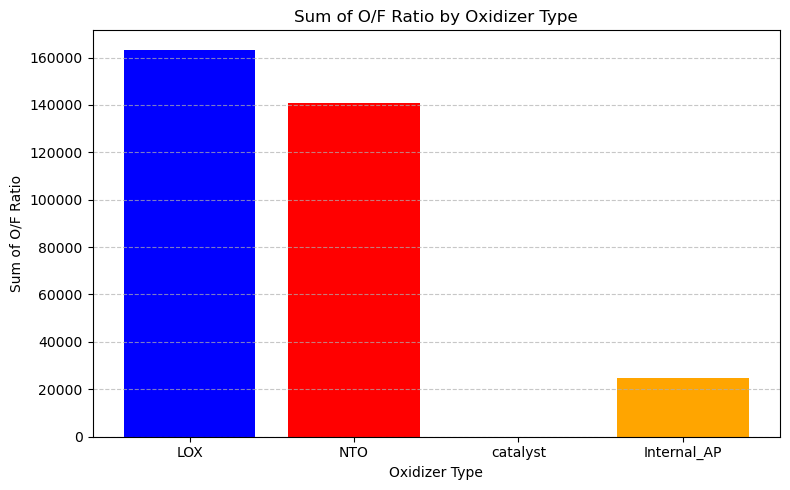

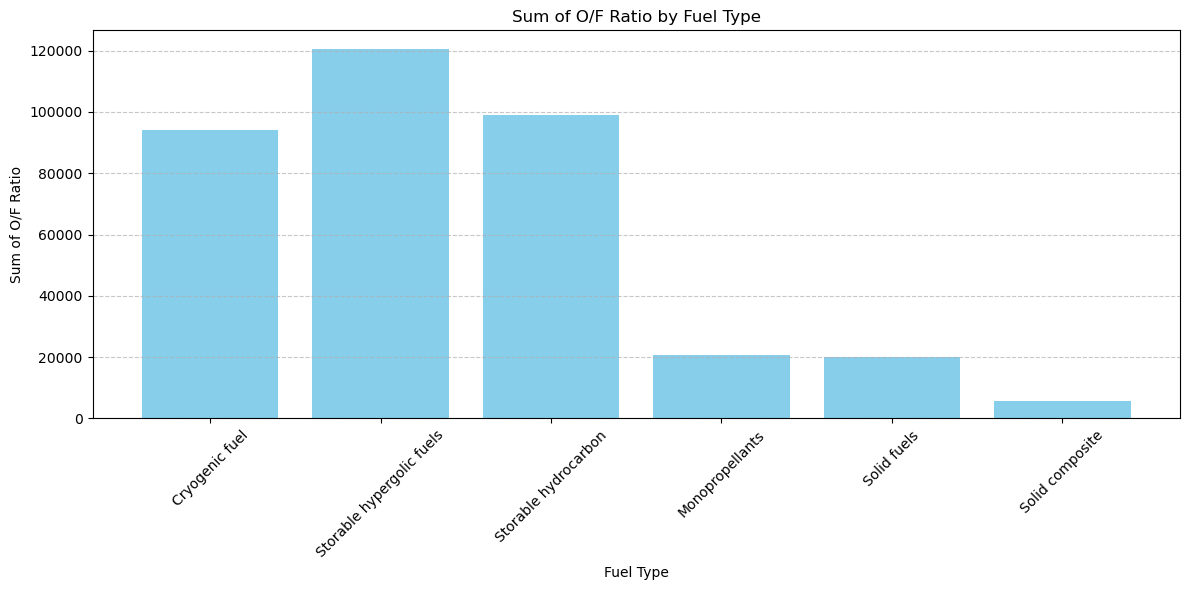

In [523]:
df['fuel_type'] = df['fuel_type'].astype(str).str.strip()
df['oxidizer_type'] = df['oxidizer_type'].astype(str).str.strip()

oxidizers = ['LOX', 'NTO', 'catalyst', 'Internal_AP']
y_oxidizer = []

for ox in oxidizers:
    subset = df[df['oxidizer_type'] == ox]
    y_oxidizer.append(subset['oxidizer_fuel_ratio'].sum())

plt.figure(figsize=(8, 5))
plt.bar(oxidizers, y_oxidizer, color=['blue', 'red', 'green', 'orange'])
plt.xlabel('Oxidizer Type')
plt.ylabel('Sum of O/F Ratio')
plt.title('Sum of O/F Ratio by Oxidizer Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Fuel Type vs Sum of O/F Ratio
fuels = df['fuel_type'].unique()
y_fuel = []

for f in fuels:
    subset = df[df['fuel_type'] == f]
    y_fuel.append(subset['oxidizer_fuel_ratio'].sum())

plt.figure(figsize=(12, 6))
plt.bar(fuels, y_fuel, color='skyblue')
plt.xlabel('Fuel Type')
plt.ylabel('Sum of O/F Ratio')
plt.title('Sum of O/F Ratio by Fuel Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

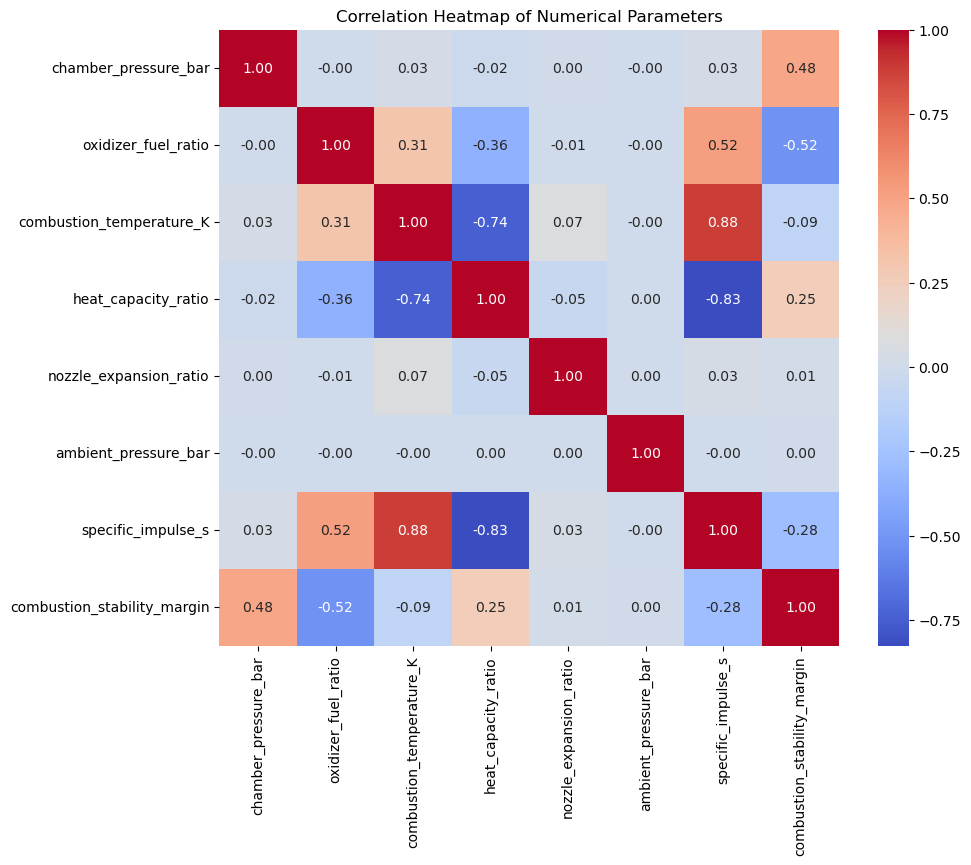

In [524]:
#Dataset1
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',)
plt.title('Correlation Heatmap of Numerical Parameters')
plt.show()

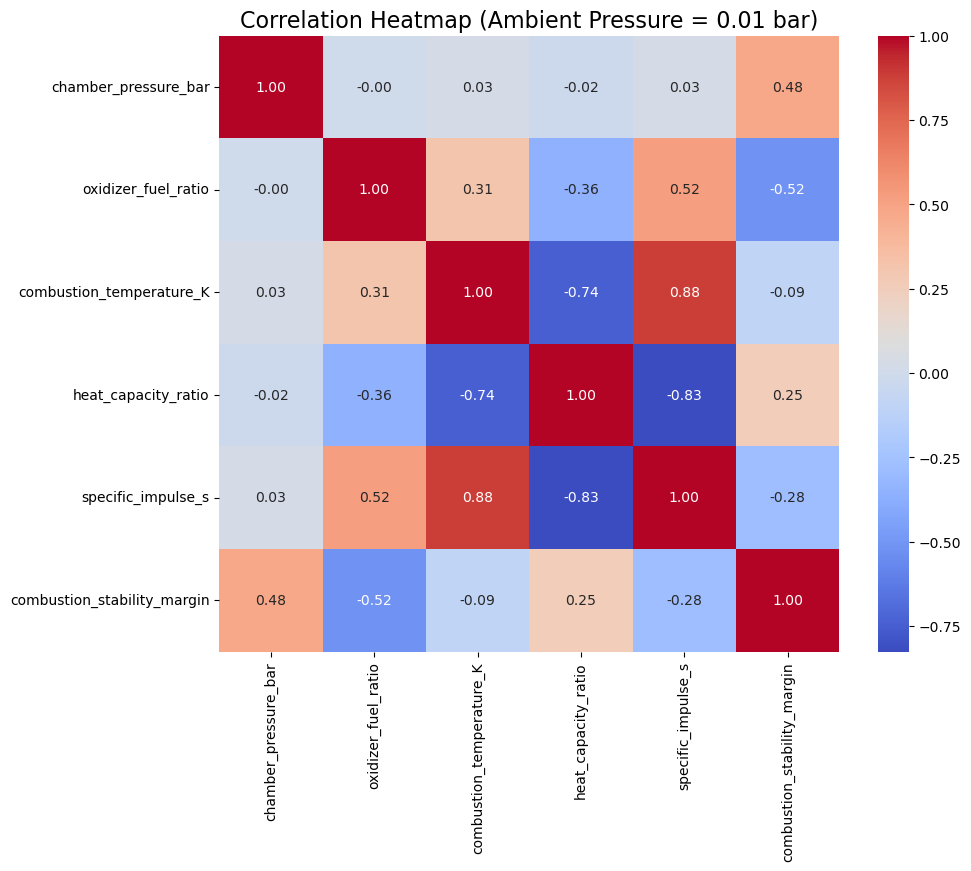

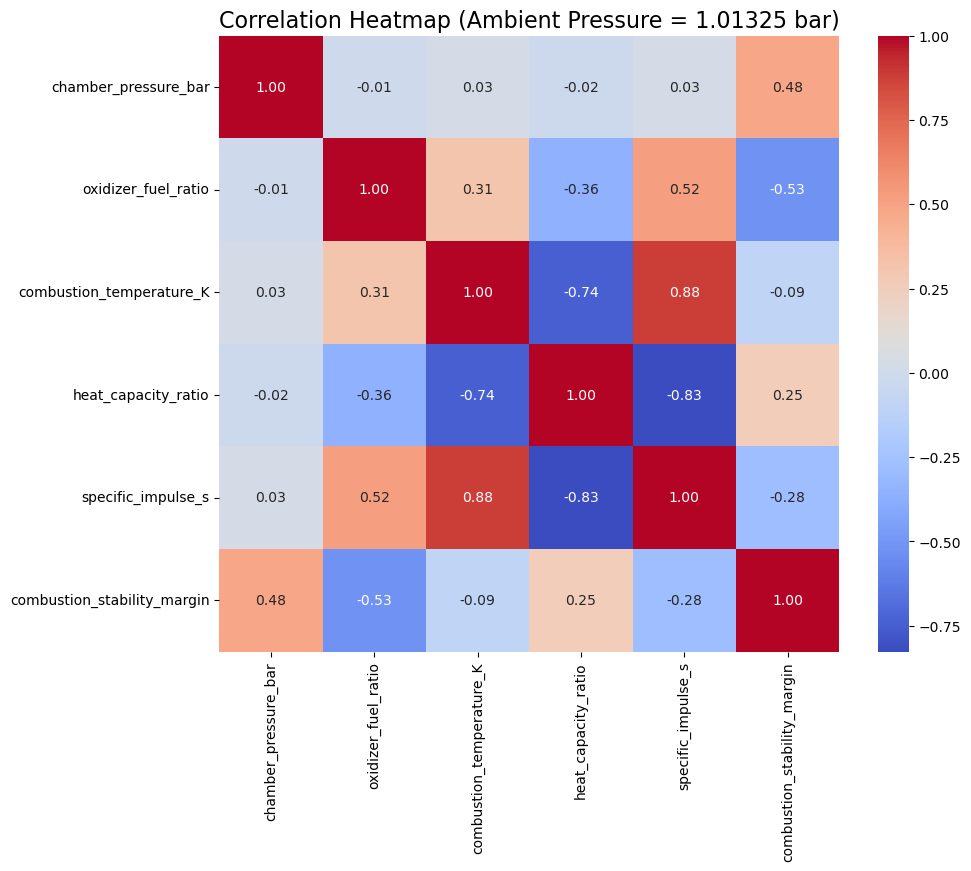

In [525]:
#Separate the dataset accoridng to ambient reading 
df= df.drop(columns=['nozzle_expansion_ratio'], errors='ignore')  # ignore if column doesn't exist

# dataset by ambient pressure
df_ambient_low = df[df['ambient_pressure_bar'] == 0.01].copy()
df_ambient_high = df[df['ambient_pressure_bar'] == 1.01325].copy()

# heatmap 
def plot_heatmap(dataframe, title):
    # numeric columns
    numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])
    # Drop columns we don't want to include in correlation
    numeric_df = numeric_df.drop(columns=['ambient_pressure_bar'], errors='ignore')
    
    plt.figure(figsize=(10,8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(title, fontsize=16)
    plt.show()


# heatmaps
plot_heatmap(df_ambient_low, f"Correlation Heatmap (Ambient Pressure = 0.01 bar)")
plot_heatmap(df_ambient_high, f"Correlation Heatmap (Ambient Pressure = 1.01325 bar)")


<span style="color:green; font-weight:bold; font-style:italic">
This gives us the disgnoses that the variable ambient_pressure_bar truly has no contirbution or relavane to the dataset and affects performance of any kind to the propulsion system engine. Therefor, I conclude the removal of such a column data.
</span>

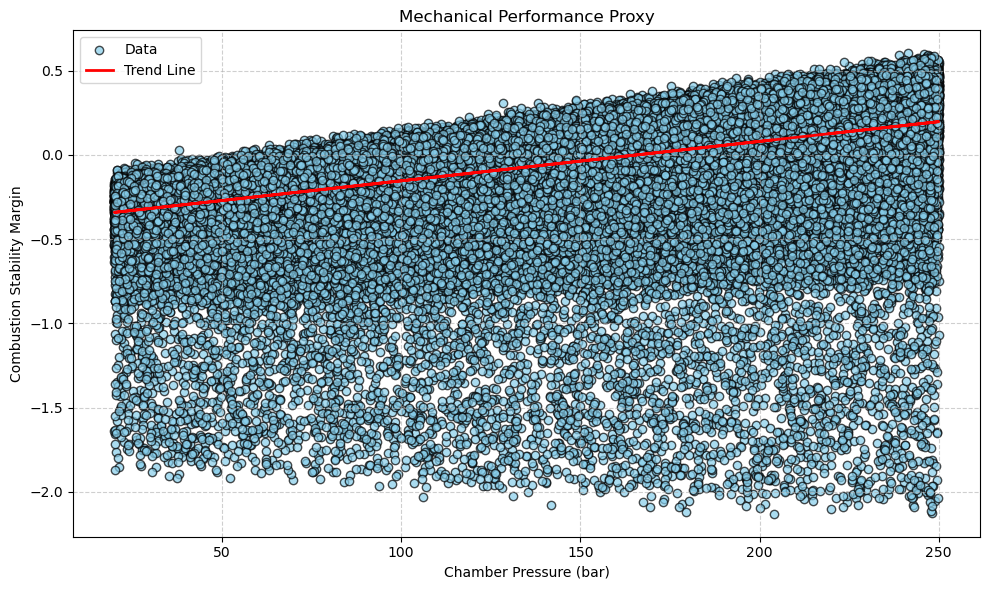

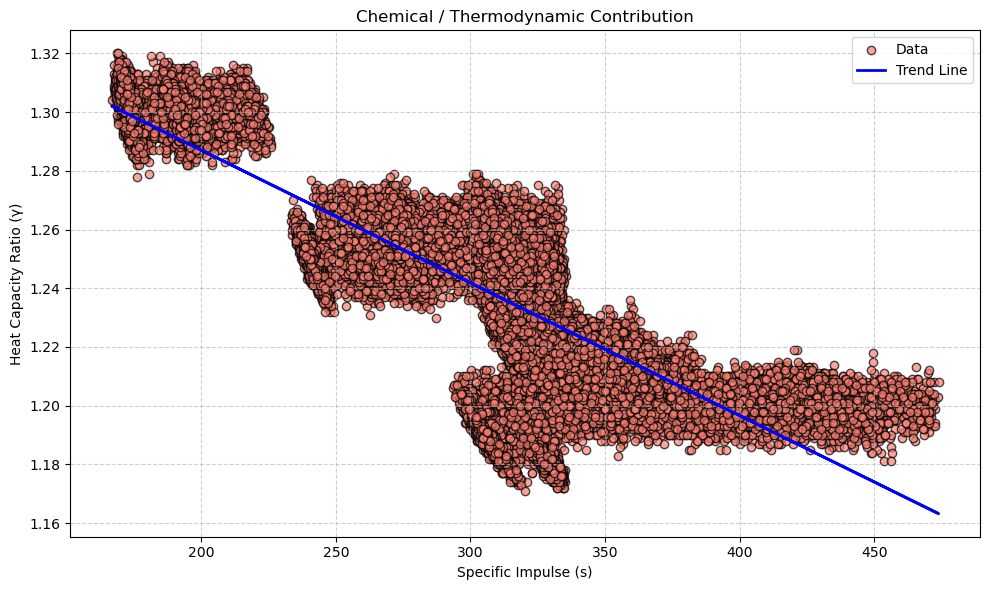

In [526]:
x_mech = df['chamber_pressure_bar']
y_mech = df['combustion_stability_margin']

#np.polyfit to fit a simple linear trend line 
coeffs_mech = np.polyfit(x_mech, y_mech, 1)  
y_fit_mech = np.polyval(coeffs_mech, x_mech)

plt.figure(figsize=(10, 6))
plt.scatter(x_mech, y_mech, color='skyblue', edgecolor='k', alpha=0.7, label='Data')
plt.plot(x_mech, y_fit_mech, color='red', linewidth=2, label='Trend Line')
plt.xlabel('Chamber Pressure (bar)')
plt.ylabel('Combustion Stability Margin')
plt.title('Mechanical Performance Proxy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


x_chem = df['specific_impulse_s']
y_chem = df['heat_capacity_ratio']

# Fit a simple linear trend line
coeffs_chem = np.polyfit(x_chem, y_chem, 1)
y_fit_chem = np.polyval(coeffs_chem, x_chem)

plt.figure(figsize=(10, 6))
plt.scatter(x_chem, y_chem, color='salmon', edgecolor='k', alpha=0.7, label='Data')
plt.plot(x_chem, y_fit_chem, color='blue', linewidth=2, label='Trend Line')
plt.xlabel('Specific Impulse (s)')
plt.ylabel('Heat Capacity Ratio (γ)')
plt.title('Chemical / Thermodynamic Contribution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

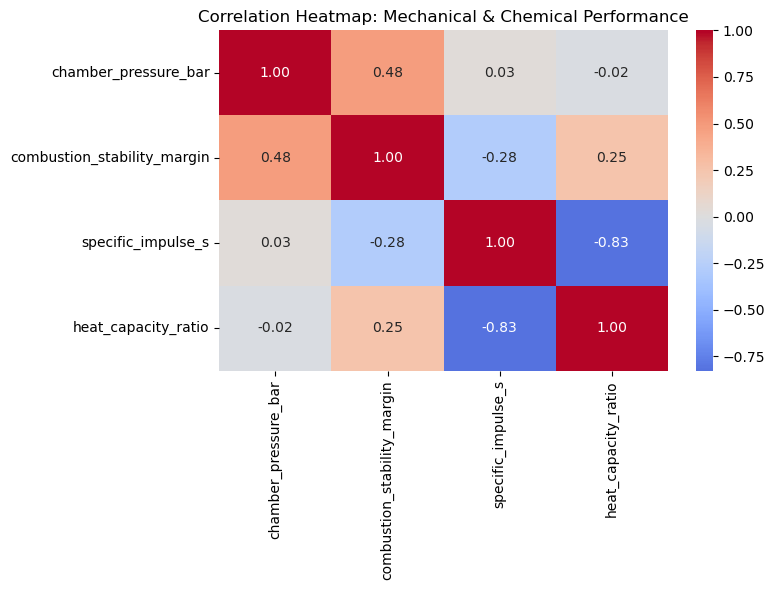

Skewness of performance variables:
chamber_pressure_bar          -0.029948
combustion_stability_margin   -1.663859
specific_impulse_s            -0.530235
heat_capacity_ratio            0.113800
dtype: float64


In [527]:
df_perf = df[['chamber_pressure_bar', 'combustion_stability_margin',
              'specific_impulse_s', 'heat_capacity_ratio']]

corr_matrix = df_perf.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap: Mechanical & Chemical Performance")
plt.tight_layout()
plt.show()
skewness = df_perf.skew()

# skewness values
print("Skewness of performance variables:")
print(skewness)


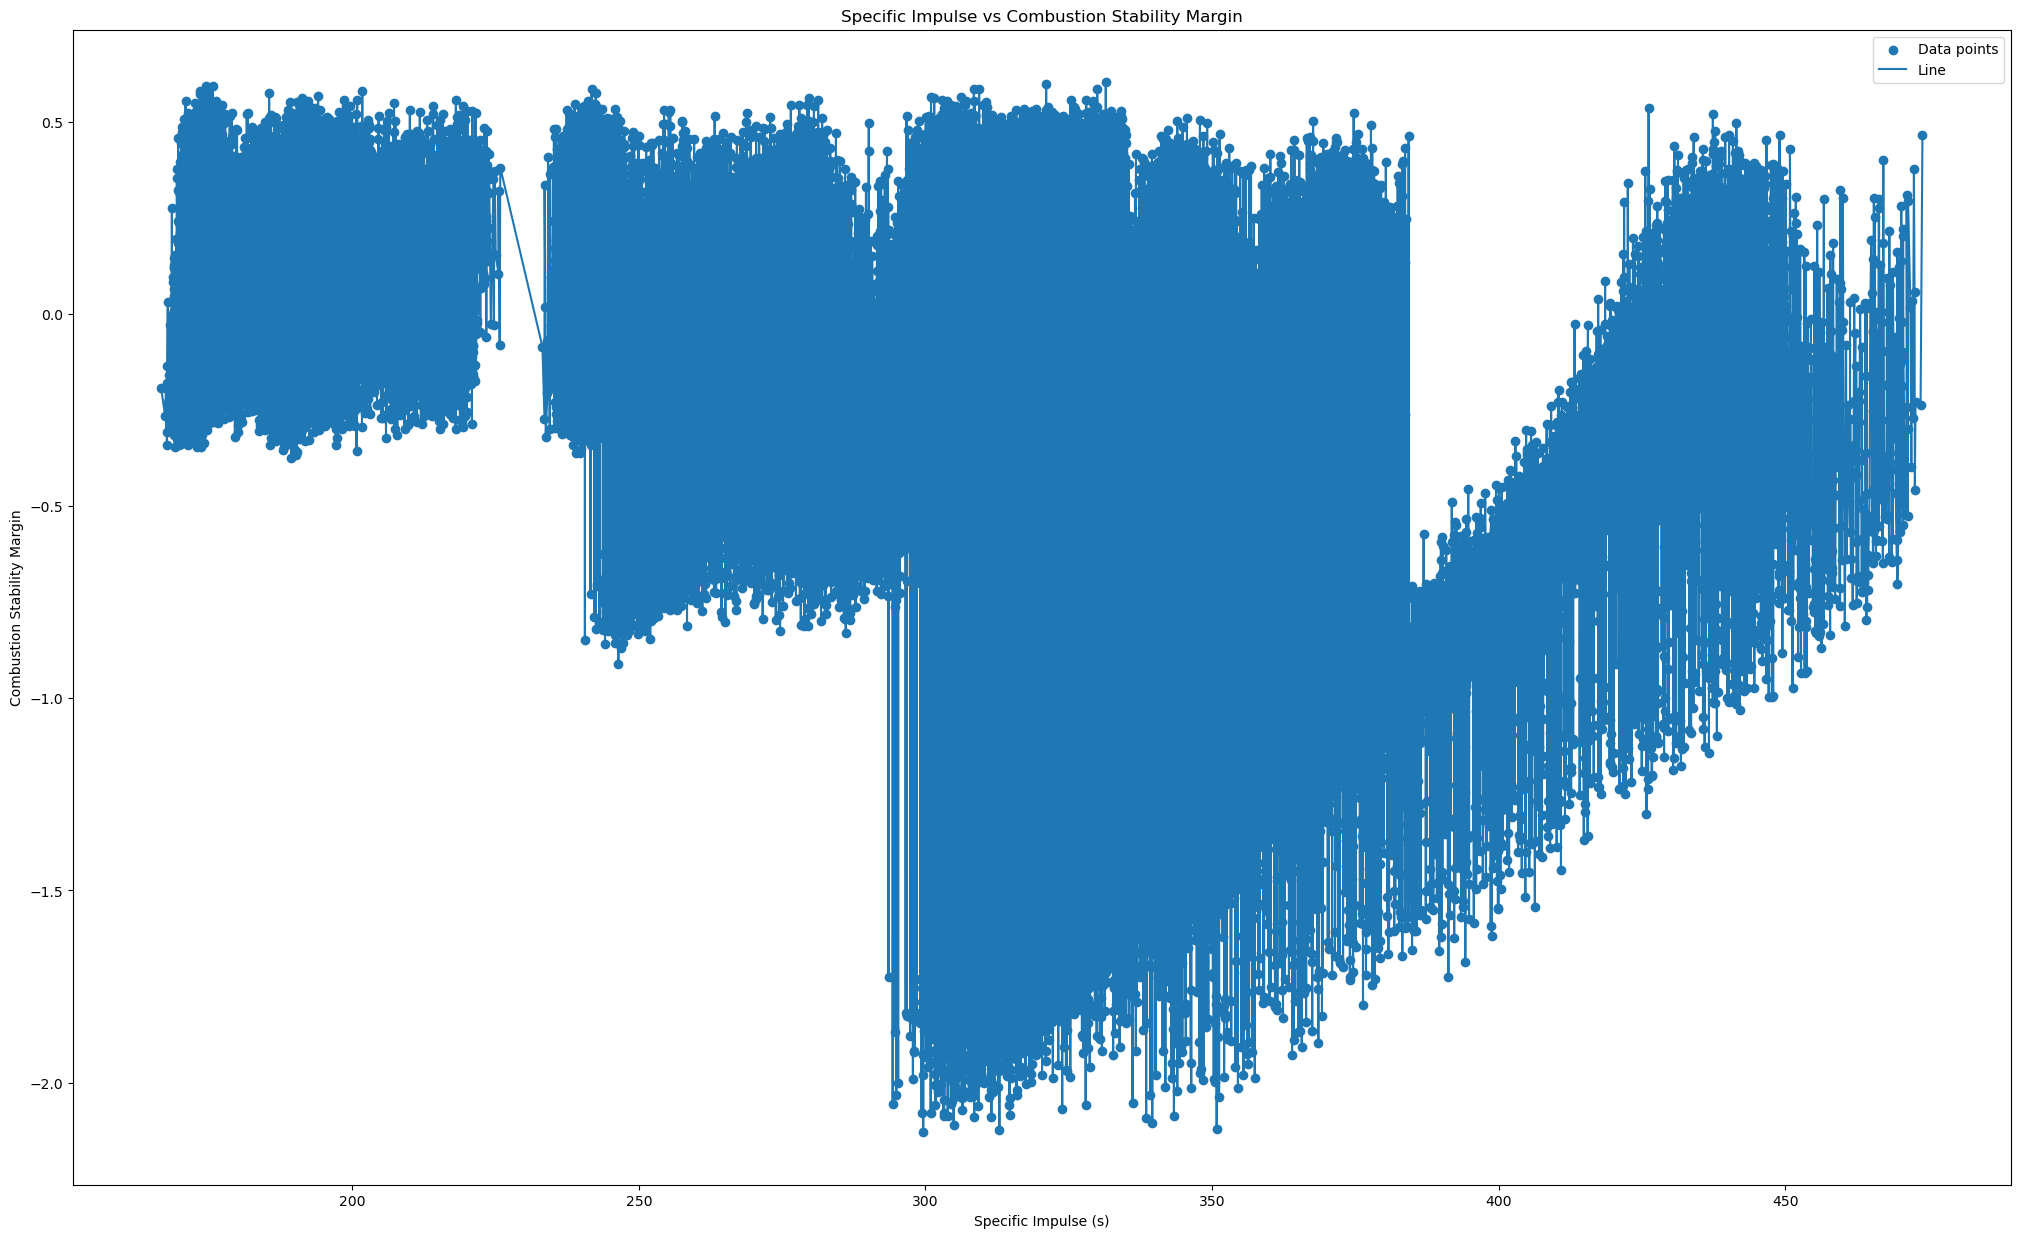

In [528]:
df_sorted = df.sort_values("specific_impulse_s")

plt.figure(figsize=(25, 15)) 

plt.scatter(df["specific_impulse_s"], df["combustion_stability_margin"], label="Data points")
plt.plot(df_sorted["specific_impulse_s"], df_sorted["combustion_stability_margin"], label="Line")

plt.xlabel("Specific Impulse (s)")
plt.ylabel("Combustion Stability Margin")
plt.title("Specific Impulse vs Combustion Stability Margin")
plt.legend()

plt.show()



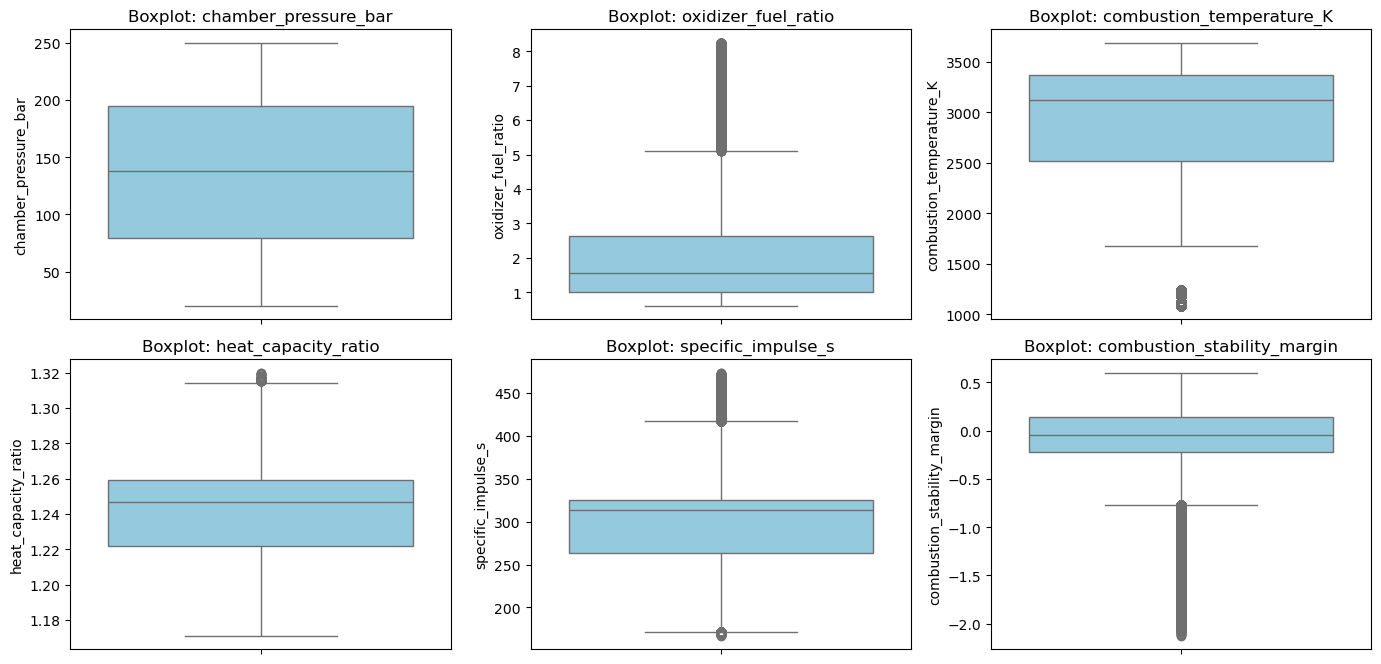

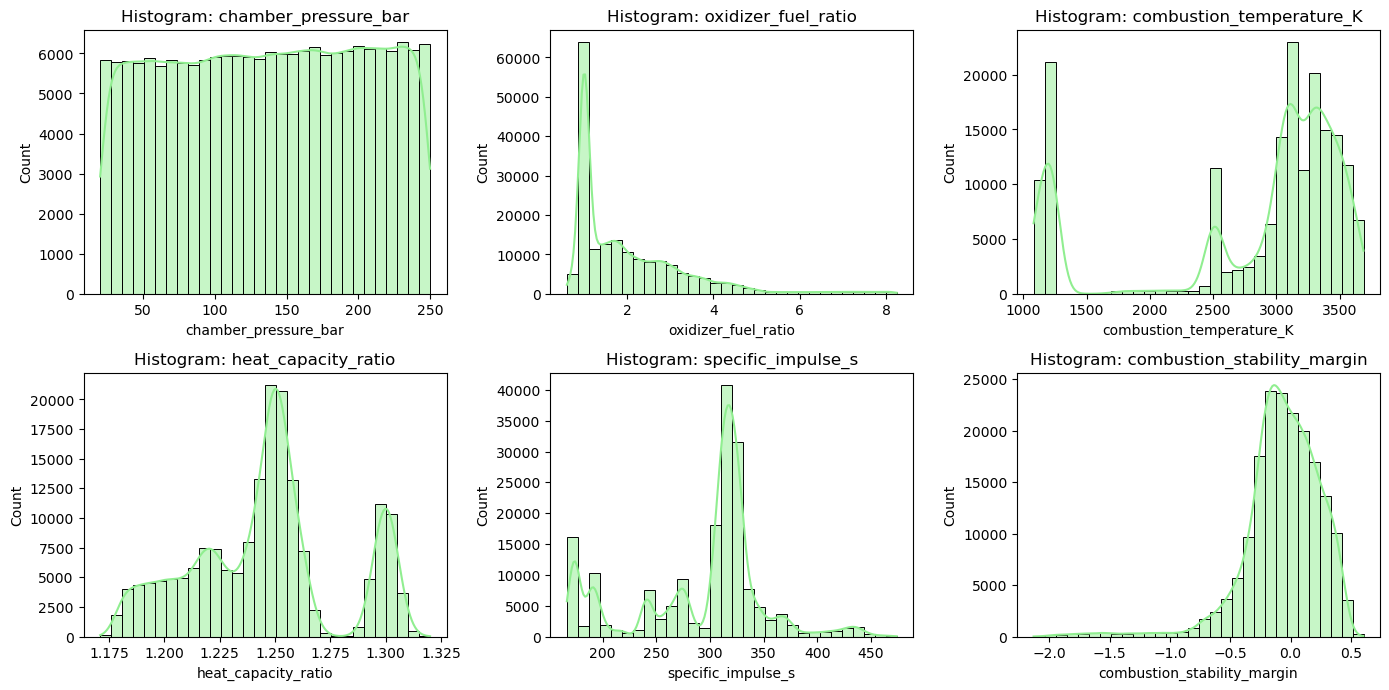

In [529]:
columns_to_check = [
    'chamber_pressure_bar',
    'oxidizer_fuel_ratio',
    'combustion_temperature_K',
    'heat_capacity_ratio',
    'specific_impulse_s',
    'combustion_stability_margin'
]

# boxplot
plt.figure(figsize=(14, 10))
plot_index = 1
for col in columns_to_check:
    plt.subplot(3, 3, plot_index)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plot_index += 1
plt.tight_layout()
plt.show()

# histogram
plt.figure(figsize=(14, 10))
plot_index = 1
for col in columns_to_check:
    plt.subplot(3, 3, plot_index)
    sns.histplot(df[col], bins=30, kde=True, color='lightgreen')
    plt.title(f'Histogram: {col}')
    plot_index += 1
plt.tight_layout()
plt.show()

<span style="color:green; font-weight:bold; font-style:italic">
Analysis using boxplots and histograms indicates that chamber_pressure_bar and nozzle_expansion_ratio show no significant outliers, suggesting stable distributions. Histograms and the heatmap further reveal that these variables are largely independent, with minimal influence on each other. Notably, chamber_pressure_bar exhibits a moderate correlation (0.48) with combustion_stability_margin, indicating a meaningful relationship while still behaving as an overall independent feature. Other variables appear largely uncorrelated with chamber pressure, confirming their independence within the dataset.
</span>

In [530]:
from scipy import stats
outlier_summary = []

for col in columns_to_check:
# IQR Method 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    
#  Z-score Method 
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    zscore_outliers = df[col][z_scores > 3]
    outlier_summary.append({'Column': col,'IQR_Outliers': len(iqr_outliers),'ZScore_Outliers': len(zscore_outliers)})

outlier_table = pd.DataFrame(outlier_summary)
print(outlier_table)

                        Column  IQR_Outliers  ZScore_Outliers
0         chamber_pressure_bar             0                0
1          oxidizer_fuel_ratio          5569             4062
2     combustion_temperature_K         31515                0
3          heat_capacity_ratio            56                0
4           specific_impulse_s          5264                0
5  combustion_stability_margin          4693             3097


<span style="color:green; font-weight:bold; font-style:italic">
Outliers were detected, but heat_capacity_ratio will be considered negligible, as they represent less than 1% of the ~170,000-record dataset. From an analytical perspective, this fraction is too small to impact results, so no further outlier treatment is required.
</span>

<span style="color:green; font-weight:bold; font-style:italic">
Outliers in the dataset have been analyzed with respect to the mean and standard deviation, revealing that a small fraction (<0.1%) of values are extreme but genuine. These true outliers warrant consideration in analysis, particularly for oxidizer_fuel_ratio and combustion_stability_margin, where their presence is critical. The IQR method has been applied to the combustion temperature to isolate outliers within a narrower range, effectively identifying extreme values in a large subset despite skewed distributions.
</span>

<span style="color:green; font-weight:bold; font-style:italic">
From an engineering perspective, these outliers often contain important information, however  certain features also signify the issues of datat storing and measurement. 
Outliers in combustion_temperature_K, combustion_stability_margin, and oxidizer_fuel_ratio are acknowledged. Specific_impulse_s is a key diagnostic feature, reflecting real system behavior under varying conditions. The Z-score analysis shows that the data’s natural dispersion, with slight variation around normal distributions, is meaningful.Hence it seems better to retanin those data features. 
</span>

In [531]:
columns_median_replace = ['oxidizer_fuel_ratio', 'combustion_stability_margin']
column_proportional = ['combustion_temperature_K']

# Median replacement for specified columns
for col in columns_median_replace:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_value = df[col].median()

    for idx, value in df[col].items():
        if value > upper or value < lower:
            # Simple median replacement
            df.at[idx, col] = median_value

# Proportional adjustment for combustion_temperature_K
for col in column_proportional:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median_value = df[col].median()

    for idx, value in df[col].items():
        if value > upper:
            # High outliers: move proportionally toward median
            proportion = (value - median_value) / median_value
            df.at[idx, col] = value - (proportion * value)
        elif value < lower:
            # Low outliers: move proportionally toward median
            proportion = (median_value - value) / median_value
            df.at[idx, col] = value + (proportion * value)

<span style="color:green; font-weight:bold; font-style:italic">
median–range (or median-based) imputation within the skew-robust range, and it is better than a plain median replacement when you want to preserve variability.
</span>

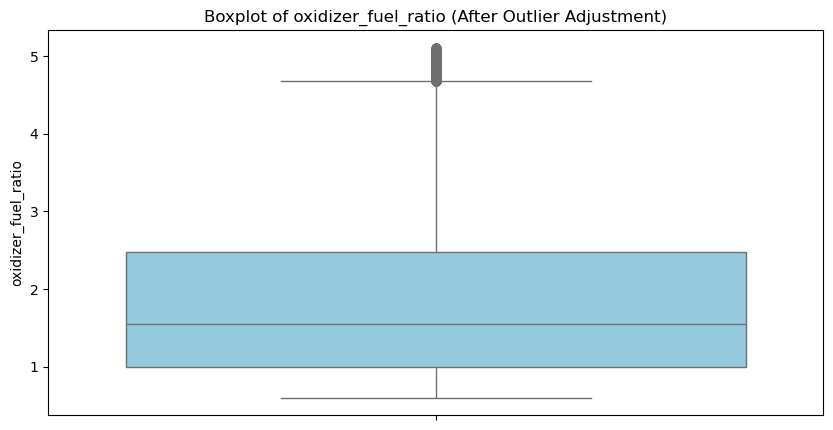

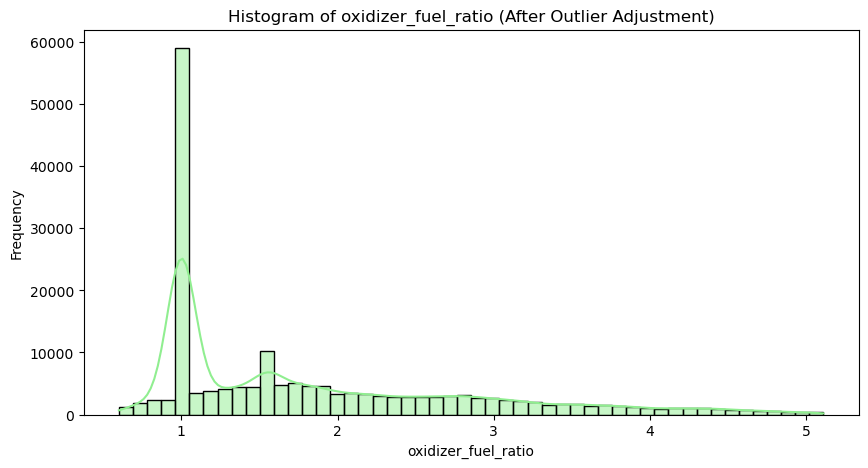

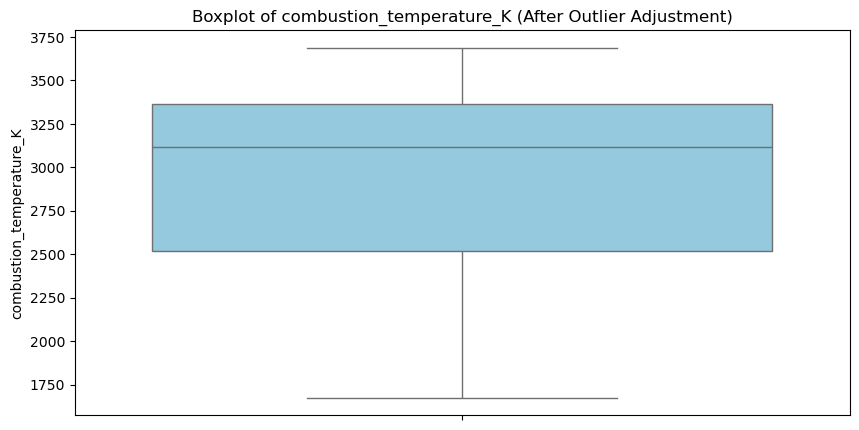

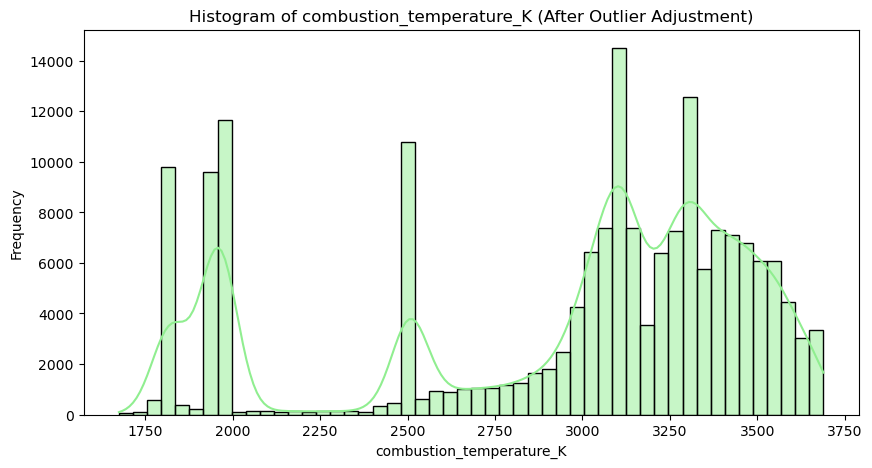

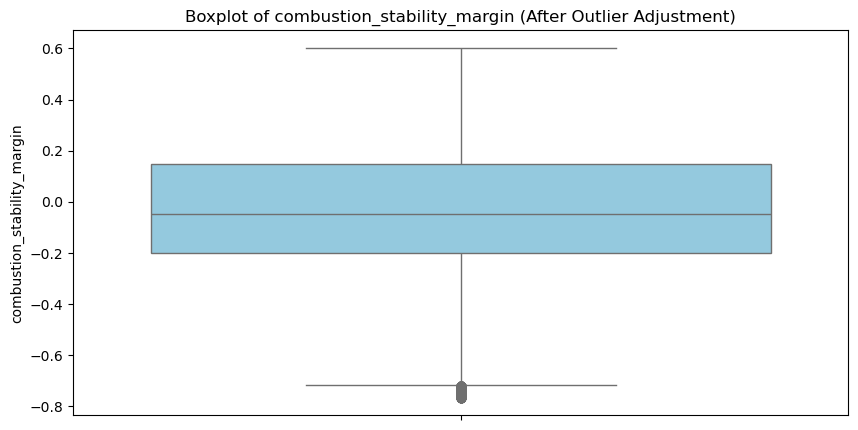

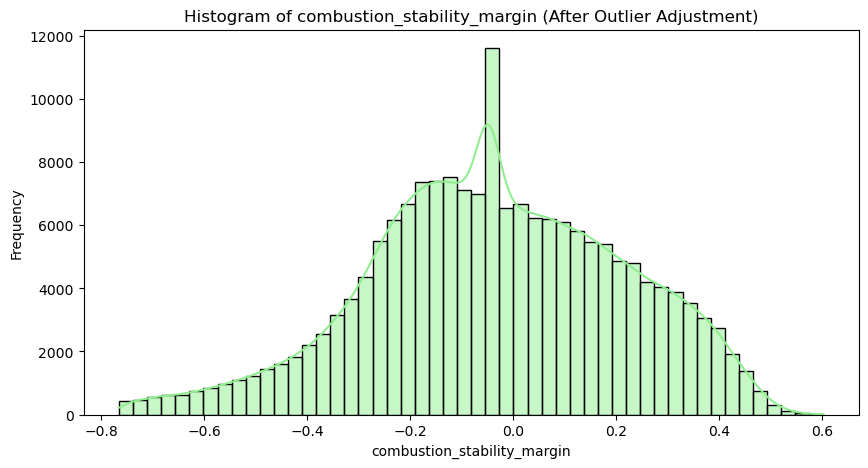

In [532]:
columns_to_process = [
    'oxidizer_fuel_ratio',
    'combustion_temperature_K',
    'combustion_stability_margin'
]
for col in columns_to_process:
    # ---- Boxplot ----
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col} (After Outlier Adjustment)')
    plt.ylabel(col)
    plt.show()

    # ---- Histogram ----
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=50, kde=True, color='lightgreen')
    plt.title(f'Histogram of {col} (After Outlier Adjustment)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<span style="color:green; font-weight:bold; font-style:italic">
I attempted to further decompose the outliers in the combustion stability margin and oxidizer fuel ratio. However, since these datasets have already been normalized and compressed, any additional decomposition does not produce meaningful reductions. The extreme values remain consistent, indicating that no further decomposition is feasible within the current numerical framework.
</span>

In [533]:
columns_to_check = [
    'oxidizer_fuel_ratio',
    'combustion_temperature_K',
    'combustion_stability_margin'
]

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    
    print(f"Column: {col} | Number of outliers: {outlier_count}")

Column: oxidizer_fuel_ratio | Number of outliers: 2215
Column: combustion_temperature_K | Number of outliers: 0
Column: combustion_stability_margin | Number of outliers: 779


<span style="color:green; font-weight:bold; font-style:italic">
The reduction in outliers is good and proportionate: Extreme deviations have been softened by a propertion, utilizing the trail and error proces to core trends remain visible. I guess this is a type of feature engineering as I implmeneted a new technique of outlier reduction : rescaling them proportionally toward the median.
</span>

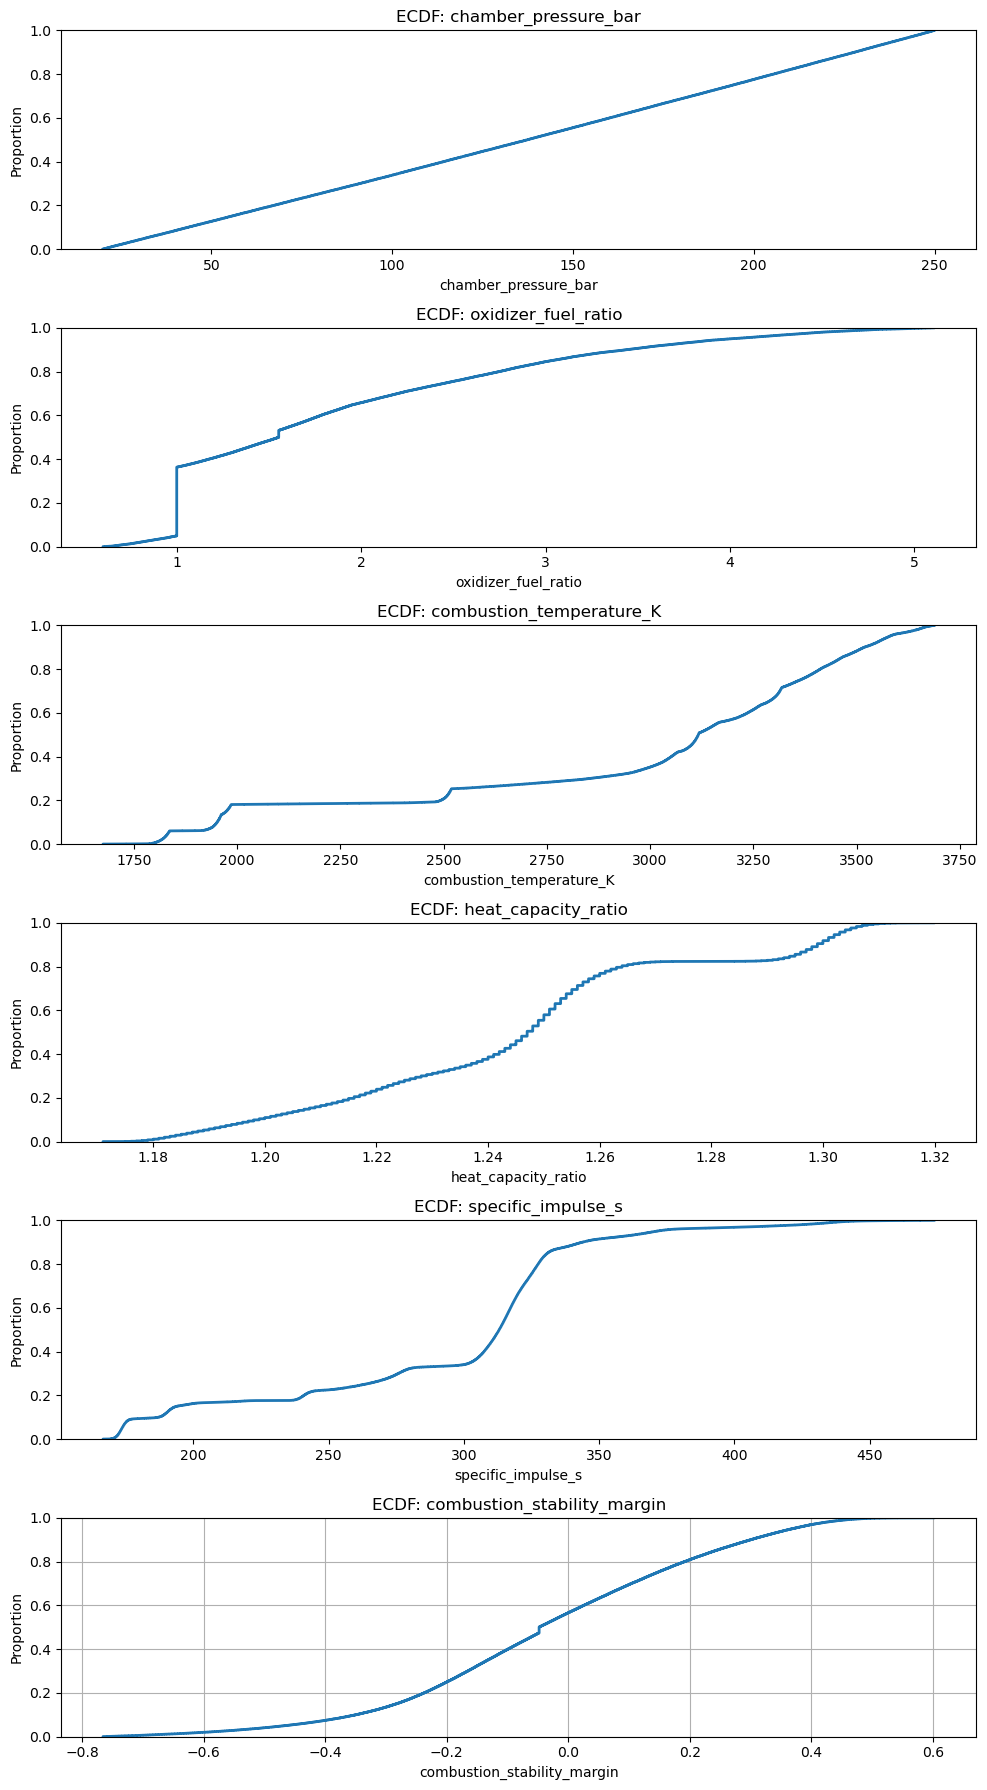

In [534]:
features = [
    "chamber_pressure_bar",
    "oxidizer_fuel_ratio",
    "combustion_temperature_K",
    "heat_capacity_ratio",
    "specific_impulse_s",
    "combustion_stability_margin"
]

n_features = len(features)
fig, axes = plt.subplots(n_features, 1, figsize=(10, 3 * n_features))
# Normal looping using indices
for i in range(n_features):
    feature = features[i]
    ax = axes[i]
    sns.ecdfplot(data=df, x=feature, linewidth=2, ax=ax)
    ax.set_title(f"ECDF: {feature}")

plt.tight_layout()
plt.grid(True)
plt.show()


<span style="color:green; font-weight:bold; font-style:italic">
To support future engineering and characteristic evaluations, we employ a cumulative distribution–based analysis rather than dense scatter plots, which is less interpretable for highly quantitative datasets. 
Specifically,the Empirical Cumulative Distribution Function (ECDF), which aggregates the data into a single line representative curve. 
This approach clearly helps observe how the distribution evolves across values, highlighting trends and relative accumulation from the dataset. 
</span>

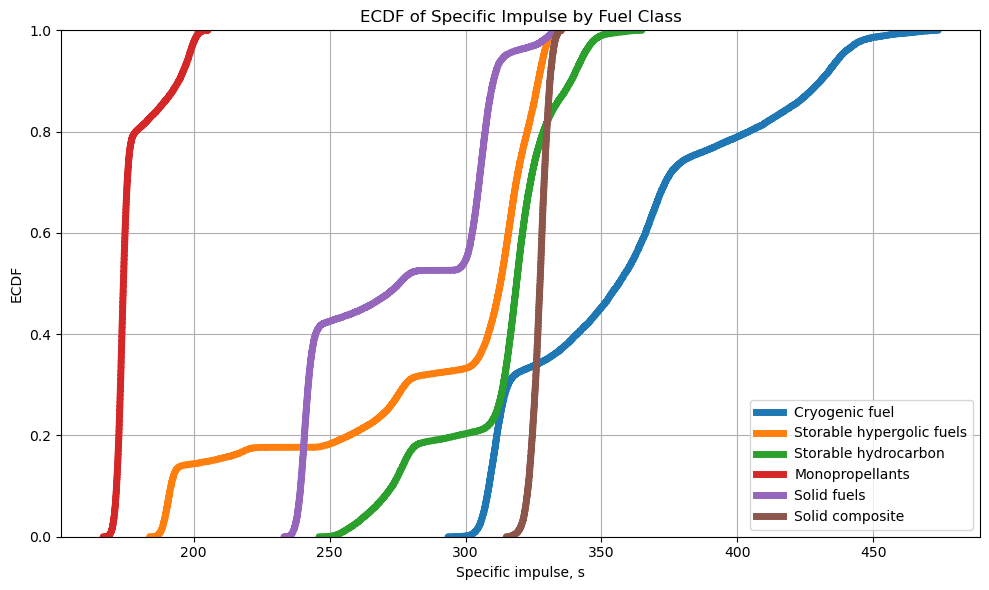

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [535]:
# Comparative Distribution Analysis by Fuel Class
plt.figure(figsize=(10, 6))
# Loop over 
for fuel_class in df['fuel_type'].unique():
    data = df[df['fuel_type'] == fuel_class]['specific_impulse_s']
    sns.ecdfplot(data=data, label=fuel_class, linewidth=5)
plt.xlabel("Specific impulse, s")
plt.ylabel("ECDF")
plt.title("ECDF of Specific Impulse by Fuel Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))


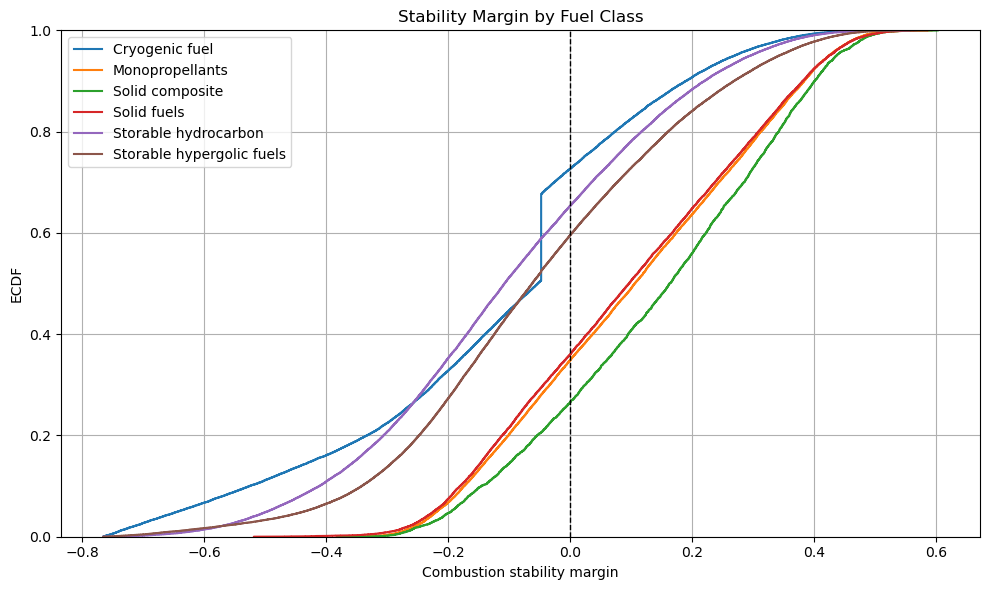

In [536]:
plt.figure(figsize=(10, 6))

for fuel_class, sub in df.groupby("fuel_type"):
    sns.ecdfplot(data=sub,x="combustion_stability_margin",label=fuel_class)

plt.axvline(0, linestyle="--", color="black", linewidth=1)
plt.xlabel("Combustion stability margin")
plt.ylabel("ECDF")
plt.title("Stability Margin by Fuel Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

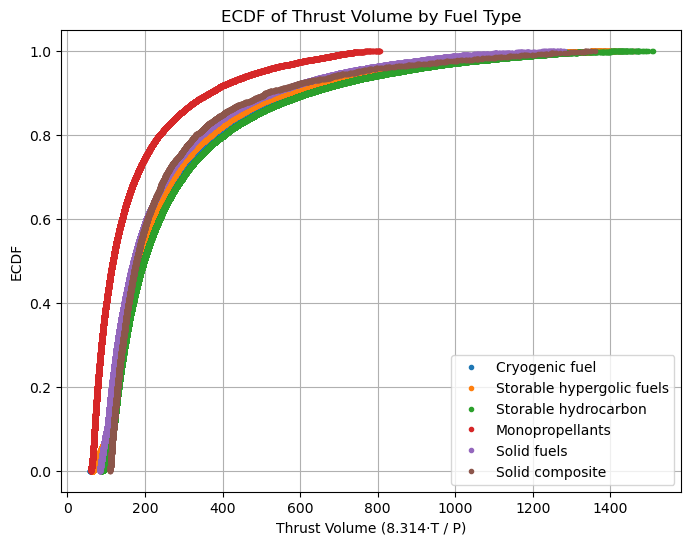

In [537]:
df['thrust_volume'] = (8.314*df['combustion_temperature_K']) / df['chamber_pressure_bar']
#per molecule
def ecdf(data):
    #ECDF
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y
fig, ax = plt.subplots(figsize=(8, 6))

for fuel in fuel_types:
    x, y = ecdf(df[df['fuel_type'] == fuel]['thrust_volume'])
    ax.plot(x, y, marker='.', linestyle='none', label=fuel)

ax.set_title('ECDF of Thrust Volume by Fuel Type')
ax.set_xlabel('Thrust Volume (8.314·T / P)')
ax.set_ylabel('ECDF')
ax.legend()
ax.grid(True)
plt.show()


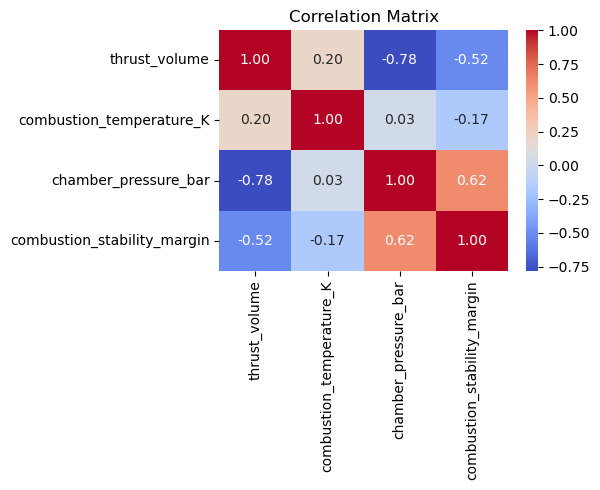

In [538]:
corr_matrix = df[['thrust_volume', 'combustion_temperature_K', 'chamber_pressure_bar', 'combustion_stability_margin']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

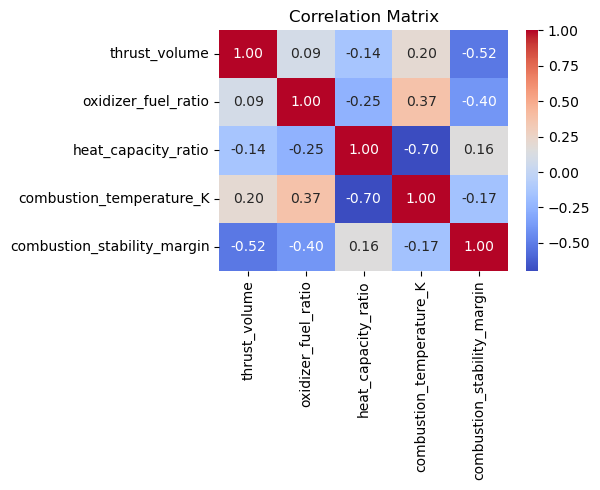

In [539]:
corr_matrix = df[['thrust_volume', 'oxidizer_fuel_ratio', 'heat_capacity_ratio','combustion_temperature_K', 'combustion_stability_margin']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [540]:
#Explicit varibles being constructed to better describe the properties of of the propulsioon engine and give further diagnostics relevant to the project.
df['thermochemical_power_index'] = (df['heat_capacity_ratio'] *df['combustion_temperature_K'] *df['oxidizer_fuel_ratio']) / df['specific_impulse_s']
# An old physics infleunced equation  mass heat capacity formula. teh expression is as such Power = (m*c*dT)/t. Just to calrify we are just implying a statistical analytical persception. 
#Not constructing actual model formulas
df['oxidizer_per_unit'] = (df['oxidizer_fuel_ratio'] / df['specific_impulse_s'])
# This expression is used to define the fuel_oxidizing ratio per unit time. 
df['stability_index_proxy'] = (df['heat_capacity_ratio'] /(df['thrust_volume'] * 2 * df['chamber_pressure_bar']))
# Another proxy approachimation approach to imitate the dynamic formula of stability of a propulsion system.
#I implied here that heat capacity relevant to data calculated due to propellant gases can be ratioed by the volume of the thrust and the pressure within the chamber.
df['pressure_isp_gamma_index'] = (df['chamber_pressure_bar'] *df['heat_capacity_ratio']) / df['specific_impulse_s']
# Here we calculate ressure-weighted thermochemical load per unit propulsion efficiency.
# ALl the features are not a direct physical quantity but a comparative diagnostic metric.

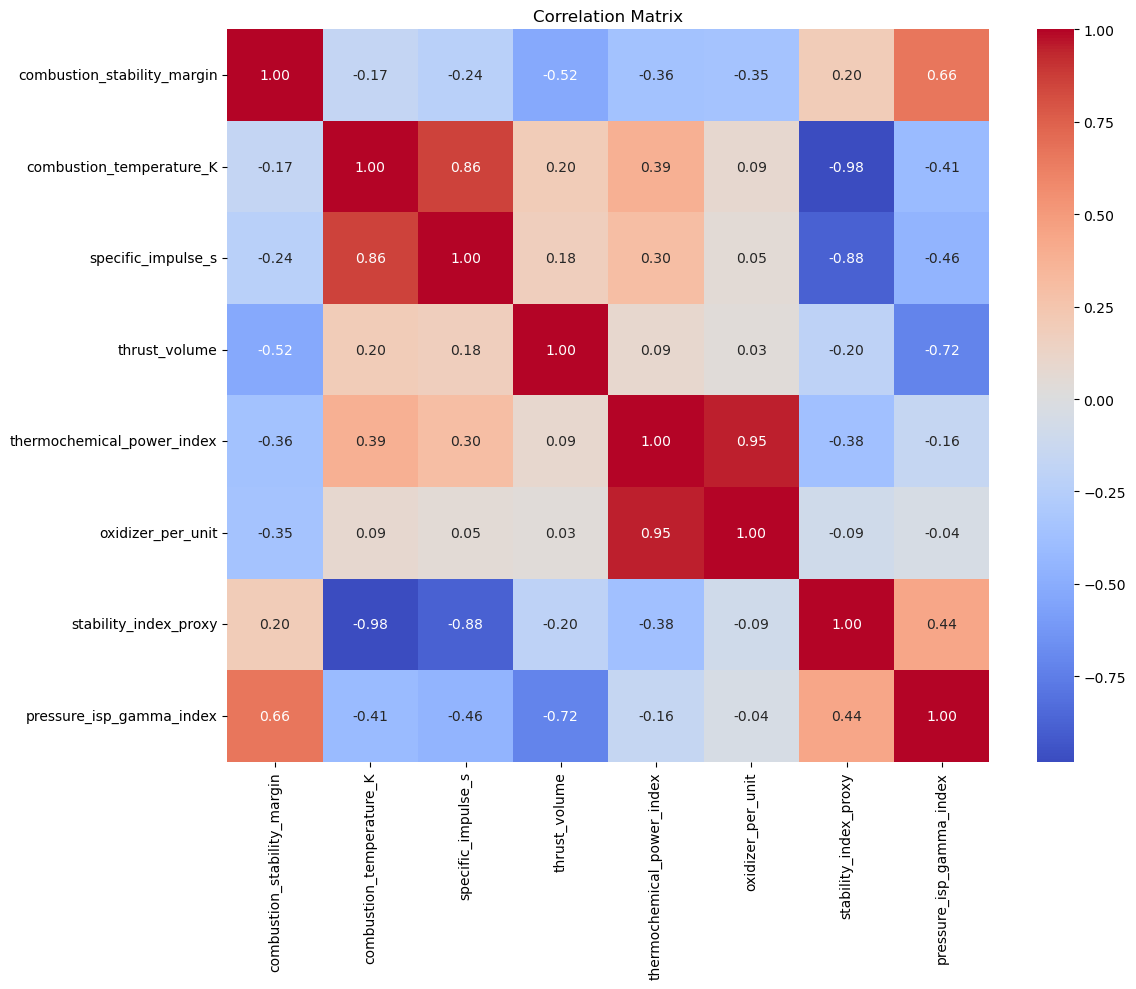

In [545]:
features = [
    'combustion_stability_margin',
    'combustion_temperature_K',
    'specific_impulse_s',
    'thrust_volume',
    'thermochemical_power_index',
    'oxidizer_per_unit',
    'stability_index_proxy',
    'pressure_isp_gamma_index'
]
corr_matrix = df[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [550]:
# Given my hypothesis is tested a nd proven to grant me better contemplation and represnetation of the correleation, I finalise further the dahboard construction.
#The heatmap shows that I wasnt able to constrcut a ideal proxy stability variable that could correlate with the combustion_stability_margin. 
#Given the feature doesnt propose much signficance I drop the feature.
df = df.drop(columns=[ 'stability_index_proxy'])

KeyError: "['stability_index_proxy'] not found in axis"

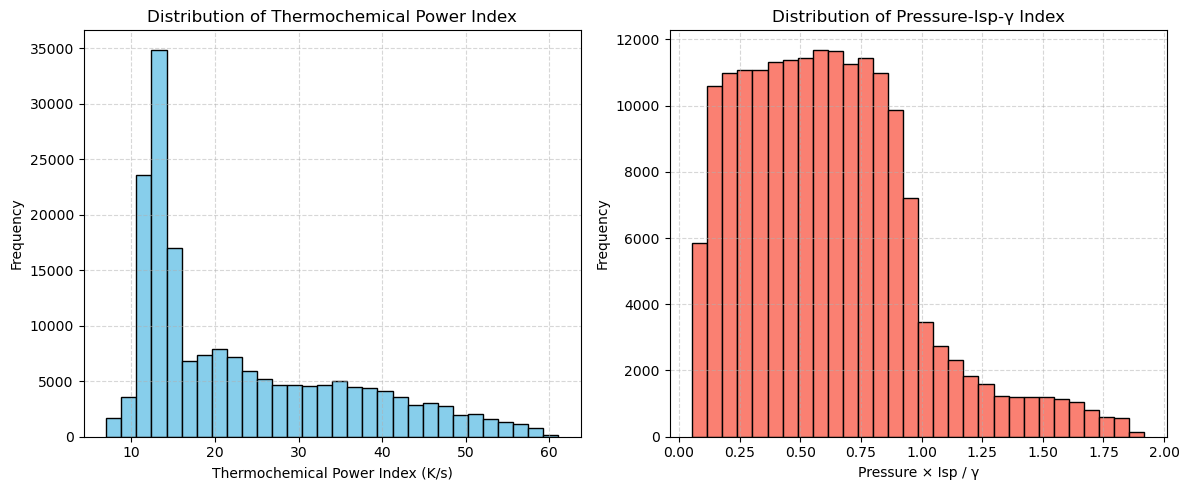

In [547]:
plt.figure(figsize=(12,5))  # Wider figure for side-by-side

# First subplot: thermochemical_power_index
plt.subplot(1, 2, 1)
plt.hist(df['thermochemical_power_index'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Thermochemical Power Index (K/s)')
plt.ylabel('Frequency')
plt.title('Distribution of Thermochemical Power Index')
plt.grid(True, linestyle='--', alpha=0.5)

# Second subplot: pressure_isp_gamma_index
plt.subplot(1, 2, 2)
plt.hist(df['pressure_isp_gamma_index'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('Pressure × Isp / γ')
plt.ylabel('Frequency')
plt.title('Distribution of Pressure-Isp-γ Index')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [556]:
x = df['chamber_pressure_bar']
y = df['combustion_stability_margin']  
#correlation 
corr, p_value = stats.pearsonr(x, y)
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.6164130370524675, p-value: 0.0


In [557]:
x = df['combustion_temperature_K']
y = df['specific_impulse_s']

corr, p_value = stats.pearsonr(x, y)
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.8588020358331074, p-value: 0.0


In [566]:
x = df['thrust_volume'].astype(float)
y = df['combustion_stability_margin'].astype(float)

corr, p_value = stats.pearsonr(x, y)
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: -0.5170628411676952, p-value: 0.0


In [562]:
t_stat, p_value = stats.ttest_rel(df['thermochemical_power_index'], df['combustion_stability_margin'])
print(f"Paired t-test: t = {t_stat}, p = {p_value}")

Paired t-test: t = 783.4245262704884, p = 0.0


In [567]:
x = df['thermochemical_power_index']
y = df['combustion_stability_margin']

corr, p_value = stats.pearsonr(x, y)
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: -0.35705300058930556, p-value: 0.0


# Conclusion

This study identifies the core variables governing **combustion stability** and **propulsion performance** from a design-engineering perspective. 

The **combustion_stability_margin** is primarily characterized by **chamber_pressure_bar**, the **pressure–isp–gamma-index**, and **thrust_volume**, with thrust volume exhibiting a strong inverse relationship to stability. This indicates that higher effective combustion volume tends to reduce stability, while pressure-driven parameters act as stabilizing factors.

**Performance deviations** are best captured through **combustion_temperature**, which serves as a forward indicator of engine operating behavior and directly influences **specific_impulse**. Specific impulse is further consolidated through the **thermochemical_power_index**, representing the effective energetic power released during ignition.

Together, **thrust volume**, **chamber pressure**, **combustion temperature**, **specific impulse**, and the derived stability indices form a compact and interpretable feature set for assessing combustion behavior, stability limits, and propulsion performance trends.


C:\Users\zuhai\AppData\Local\Temp\ipykernel_21900\1029923989.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zuhai\AppData\Local\Temp\ipykernel_21900\1029923989.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zuhai\AppData\Local\Temp\ipykernel_21900\1029923989.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zuhai\AppData\Local\Temp\ipykernel_21900\1029923989.py:12: FutureWarning:

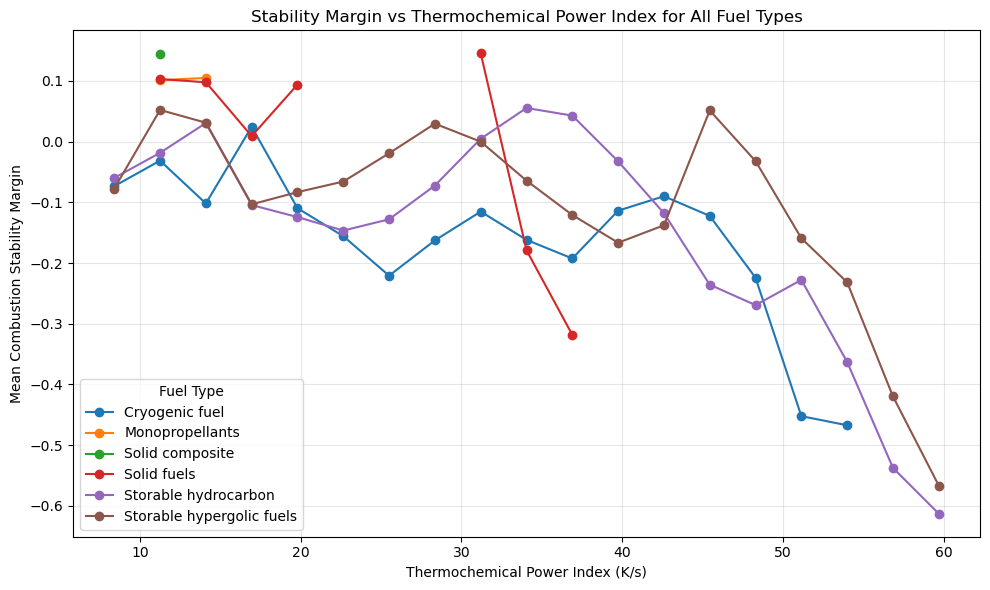

In [548]:
bins = np.linspace(df['thermochemical_power_index'].min(),
                   df['thermochemical_power_index'].max(), 20)

plt.figure(figsize=(10,6))

# Loop through each fuel type
for fuel_type, group in df.groupby('fuel_type'):
    # Bin TPI
    group['tpi_bin'] = pd.cut(group['thermochemical_power_index'], bins=bins)
    
    # Compute mean stability margin per bin
    mean_stability = group.groupby('tpi_bin')['combustion_stability_margin'].mean()
    
    # Plot the line for this fuel type
    plt.plot(mean_stability.index.categories.mid, mean_stability.values,
             marker='o', linestyle='-', label=fuel_type)

# Labels and title
plt.xlabel('Thermochemical Power Index (K/s)')
plt.ylabel('Mean Combustion Stability Margin')
plt.title('Stability Margin vs Thermochemical Power Index for All Fuel Types')
plt.legend(title='Fuel Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [549]:
# files we need to store new the data according to the ambient temperature. Altough it has no high significance, it appeals to describe the environmental variable. 
# Split for ambient pressure 0.01 → Vacuum66.csv
vacuum_df = df[df['ambient_pressure_bar'] == 0.01]
vacuum_df.to_csv("Vacum_Statistics.csv", index=False)

# Split for ambient pressure 1.01325 
ground_df = df[df['ambient_pressure_bar'] == 1.01325]
ground_df.to_csv("Ground_Statistics.csv", index=False)